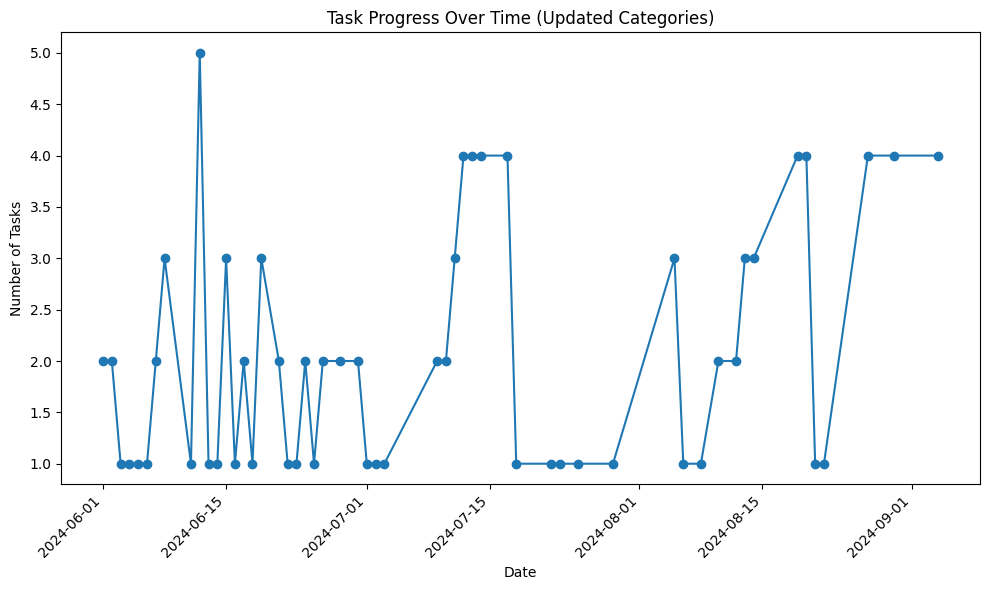

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Load the cleaned Excel file
file_path = 'Cleaned_100_Days_Journey.xlsx'
cleaned_journey_df = pd.read_excel(file_path)

# Clean and update categories
cleaned_journey_df['Category'] = cleaned_journey_df['Category'].str.replace(r'\s+', '', regex=True)
cleaned_journey_long = cleaned_journey_df.assign(Category=cleaned_journey_df['Category'].str.split(',')).explode('Category')
cleaned_journey_long = cleaned_journey_long.dropna(subset=['Category'])

# Mapping categories
category_mapping = {
    'Seaborn': 'Python',
    'Numpy': 'Python',
    'Matplotlib': 'Python',
    'PythonEDA': 'Python',
    'SQL': 'PostgreSQL',
    'SQI': 'PostgreSQL',
    'AWSCloud': 'AWS',
    'Obsidian': None
}

# Apply mapping and remove 'None' (Obsidian)
cleaned_journey_long['Category'] = cleaned_journey_long['Category'].replace(category_mapping)
cleaned_journey_long = cleaned_journey_long.dropna(subset=['Category'])

# Line Chart: Task Progress Over Time
plt.figure(figsize=(10, 6))
cleaned_journey_long.groupby('Date').size().plot(kind='line', marker='o')
plt.title('Task Progress Over Time (Updated Categories)')
plt.xlabel('Date')
plt.ylabel('Number of Tasks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




<Figure size 1000x600 with 0 Axes>

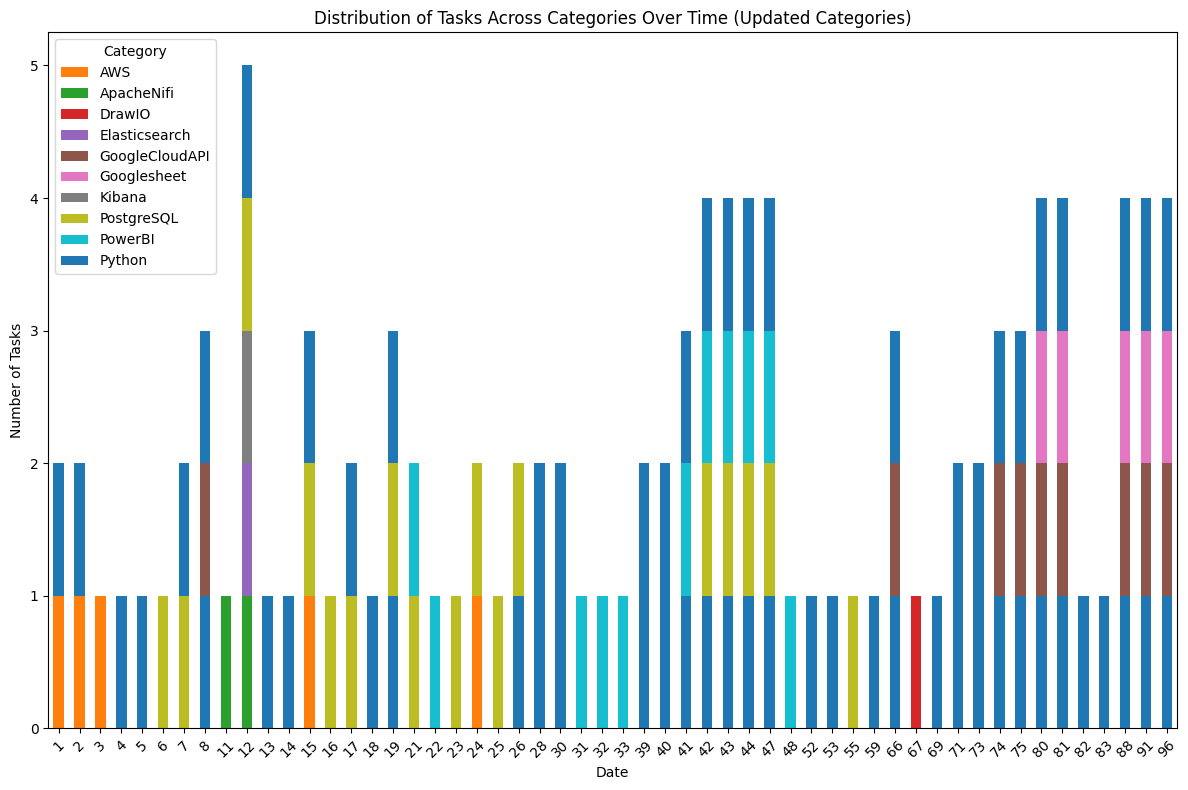

In [28]:
# Stacked Column Chart: Distribution of tasks across categories
category_task_count_updated = cleaned_journey_long.groupby(['Day', 'Category']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
category_task_count_updated.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Tasks Across Categories Over Time (Updated Categories)')
plt.xlabel('Date')
plt.ylabel('Number of Tasks')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()



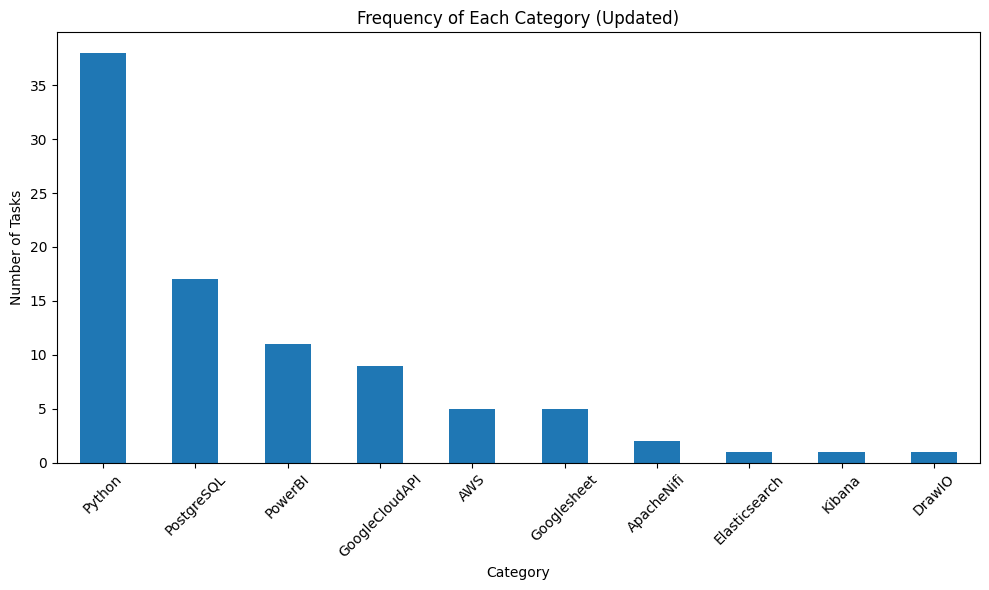

In [32]:

# Filter out null and space values from the 'Category' column
filtered_category = cleaned_journey_long['Category'].replace('', pd.NA).dropna()

# Bar Chart: Frequency of each Category (ignoring null or space values)
plt.figure(figsize=(10, 6))
filtered_category.value_counts().plot(kind='bar')
plt.title('Frequency of Each Category (Updated)')
plt.xlabel('Category')
plt.ylabel('Number of Tasks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


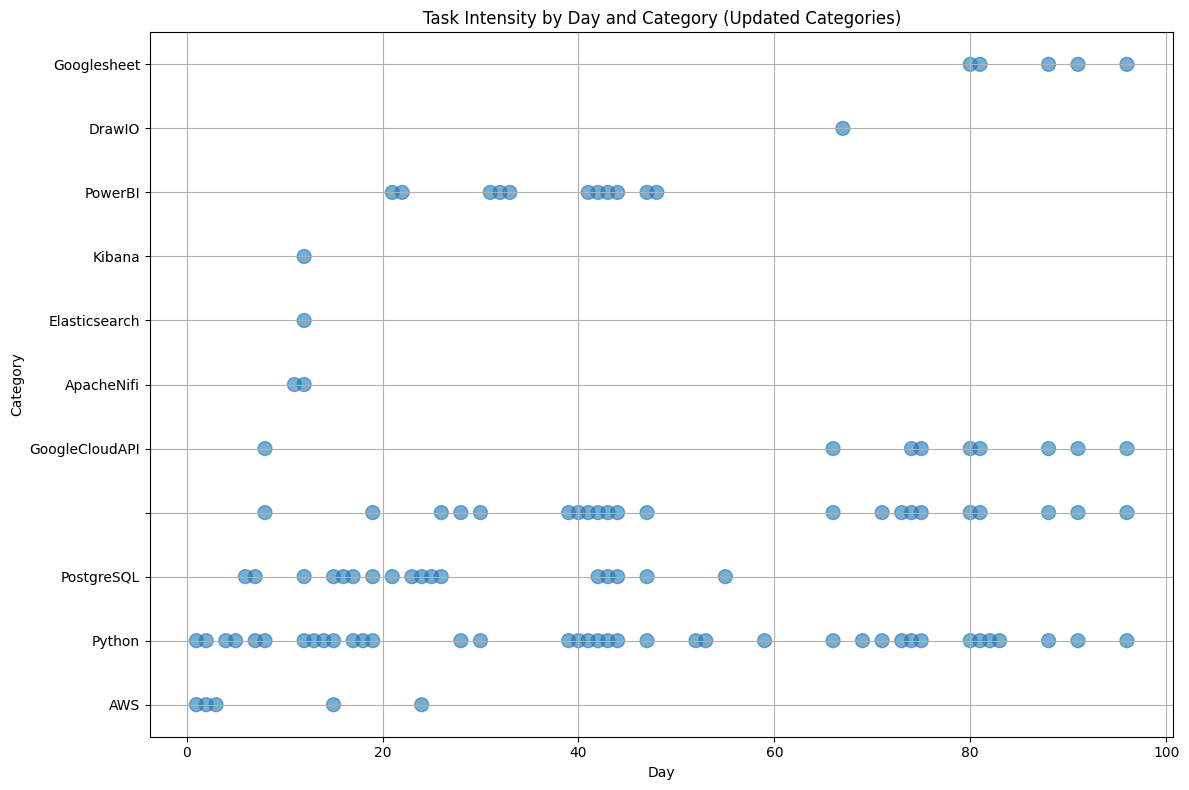

In [30]:
# Bubble Chart: Task intensity by day and category
task_intensity_updated = cleaned_journey_long.groupby(['Day', 'Category']).size().reset_index(name='TaskCount')
plt.figure(figsize=(12, 8))
plt.scatter(task_intensity_updated['Day'], task_intensity_updated['Category'], s=task_intensity_updated['TaskCount']*100, alpha=0.6)
plt.title('Task Intensity by Day and Category (Updated Categories)')
plt.xlabel('Day')
plt.ylabel('Category')
plt.grid(True)
plt.tight_layout()
plt.show()

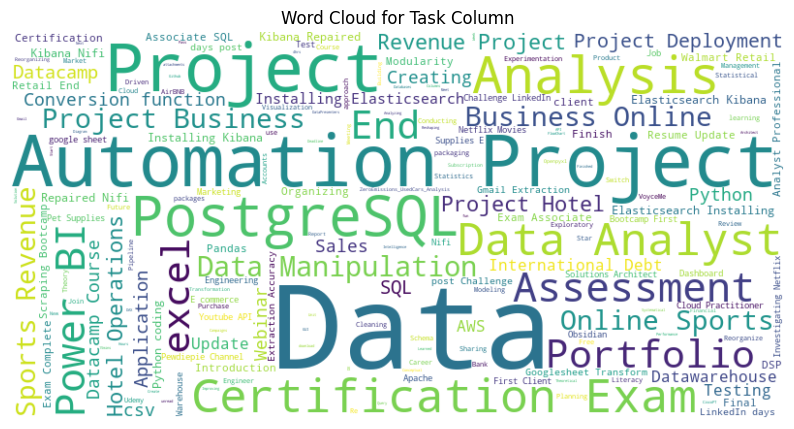

In [31]:
# Generate a word cloud for the 'Task' column
task_text = ' '.join(cleaned_journey_long['Task'].dropna().tolist())

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(task_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Task Column')
plt.show()